In [1]:
import tensorflow as tf

In [2]:
a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")
f = a + b
init = tf.global_variables_initializer()
with tf.Session() as s:
    init.run()
    print(f.eval())

3


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
sess = tf.InteractiveSession()
mnist  = input_data.read_data_sets("MNIST_data", one_hot=True)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])
    label = mnist.train.labels[num].argmax(axis=0)
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


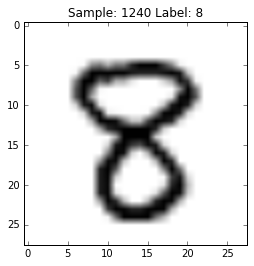

In [11]:
display_sample(1240)

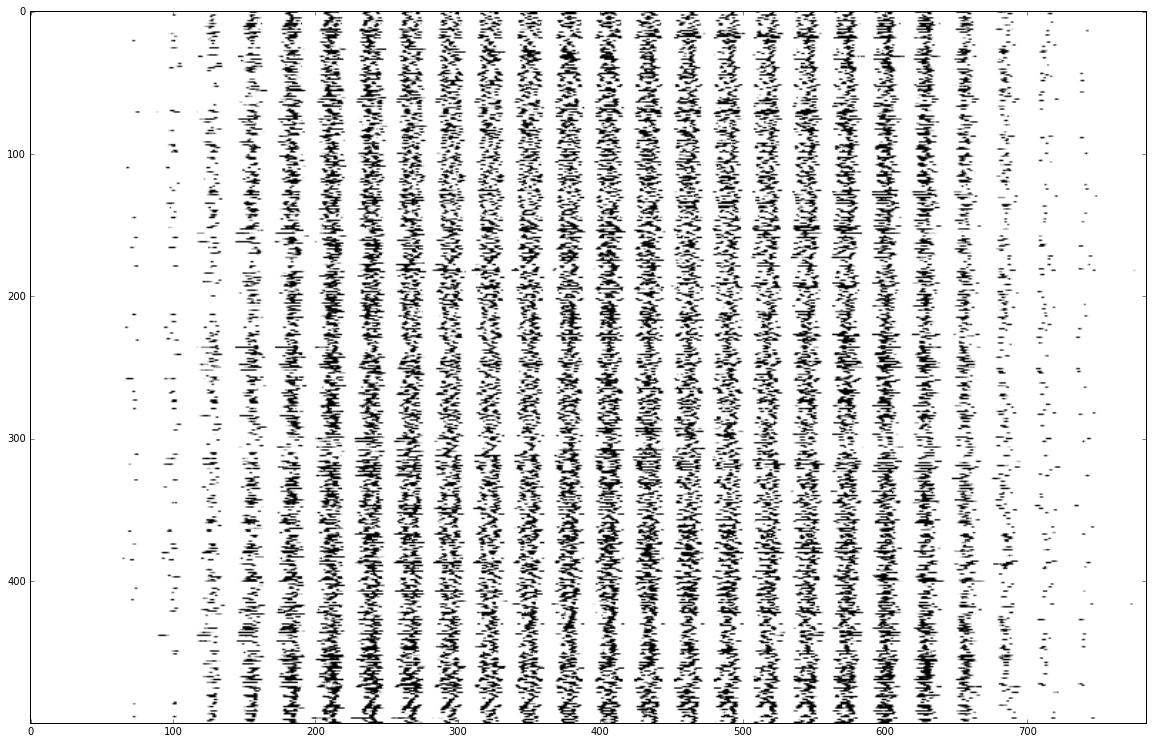

In [15]:
import numpy as np
images = mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.figure(figsize=(20,100))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [16]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [18]:
# here we define the tensors and their nodes
hidden_nodes = 512
#input perceptrons
input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))
# perceprtons of the hidden layer
hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))


In [20]:
#defining the layers
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights)+ hidden_biases

In [21]:
#loss function
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [22]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [23]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
#initializing the variables to run the training
tf.global_variables_initializer().run()
for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if((x+1) % 100 == 0):
        print("Training Epoch" + str(x+1))
        print("Accuracy" + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training Epoch100
Accuracy0.8549
Training Epoch200
Accuracy0.8764
Training Epoch300
Accuracy0.8929
Training Epoch400
Accuracy0.8988
Training Epoch500
Accuracy0.9042
Training Epoch600
Accuracy0.9024
Training Epoch700
Accuracy0.9091
Training Epoch800
Accuracy0.9147
Training Epoch900
Accuracy0.9201
Training Epoch1000
Accuracy0.9152
Training Epoch1100
Accuracy0.9225
Training Epoch1200
Accuracy0.9206
Training Epoch1300
Accuracy0.9246
Training Epoch1400
Accuracy0.9251
Training Epoch1500
Accuracy0.923
Training Epoch1600
Accuracy0.9274
Training Epoch1700
Accuracy0.924
Training Epoch1800
Accuracy0.9291
Training Epoch1900
Accuracy0.9271
Training Epoch2000
Accuracy0.9298


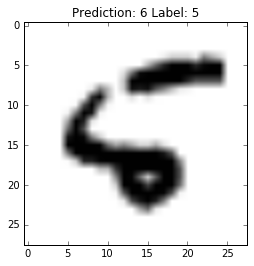

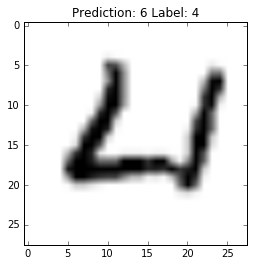

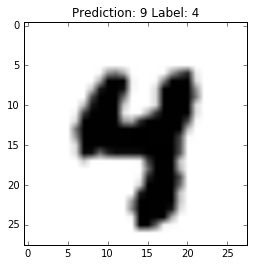

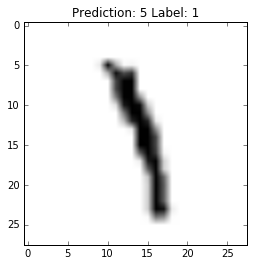

In [29]:
#checking the letters that tf couldnt recognize
for x in range(100):
    #load a single test image and its labels
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    #convert the one-hot label to an integer
    label = y_train.argmax()
    prediction  = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    if(prediction != label):
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()
    